다음 링크의 'kaggle 타이타닉 시작하기' 내용 연습<br>
http://writeren.tistory.com/68?category=757132

# 데이터 기본 분석

In [289]:
import pandas as pd
%matplotlib inline

In [290]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
#print("train : ", train.shape, " ", " test : ", test.shape)
train.head()
test.head()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## 입력 데이터 :

- **PassengerId** : 승객 번호<br>
- **Survived** : 생존여부(1: 생존, 0 : 사망)<br>
- **Pclass** : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)<br>
- **Name** : 승객 이름<br>
- **Sex** : 승객 성별 (male/female)<br>
- **Age** : 승객 나이(float) <br>
- **SibSp** : 동반한 형제자매, 배우자 수<br>
- **Parch** : 동반한 부모, 자식 수<br>
- **Ticket** : 티켓의 고유 넘버(문자열)<br>
- **Fare** 티켓의 요금(float)<br>
- **Cabin** : 객실 번호<br>
- **Embarked** : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)<br>


In [291]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [292]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

먼저 비어있는(null) 데이터를 처리해야 한다.
데이터가 누락된 항목을 확인해서, 너무 많이 빠진 항목이면 제거하고, 중요한 항목이거나 너무 많이 빠져 있지 않으면 데이터를 채워 넣도록 한다.

**Age** : null이 꽤 있고, 나이가 중요할 것으로 판단되니 데이터를 채워야 할 필요가 있다.<br>
**Cabin** : null이 너무 많다. 삭제할것.<br>
**Embarked** : null이 거의 없으므로 중요하지 않은 값으로 채워도 문제가 없어 보임<br>

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # 스타일/폰트 등의 속성 설정. 기본값으로 설정한다.

In [294]:
def bar_chart(feature):
    '''
    특정 feature를 'Survived' 값에 따라 분류해서 chart로 보여준다.
    
    functions :
        value_counts():Return a Series containing counts of unique values.
            내림차순으로 정렬된 feature의 데이터 타입당 갯수들의 배열을 리턴한다.
                        
    '''   
     
    survived = train[train['Survived'] == 1][feature].value_counts() # 생존자('Survived' == 1)에서 feature 정보를 뽑고 수가 많은 순서로 정렬 (fig1_count(max), fig2_count...)
    dead = train[train['Survived'] == 0][feature].value_counts() # 사망자('Survived' == 0)에서 feature 정보를 뽑고 수가 많은 순서로 정렬
#     print("survived:\n", survived)
#     print("\ndead:\n", dead)
    
    #print("survived:", survived.shape)
    df = pd.DataFrame([survived, dead])
    print("\ndf:\n", df)
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5)) #figsize(w, h) 차트의 width/height


df:
      female  male
Sex     233   109
Sex      81   468


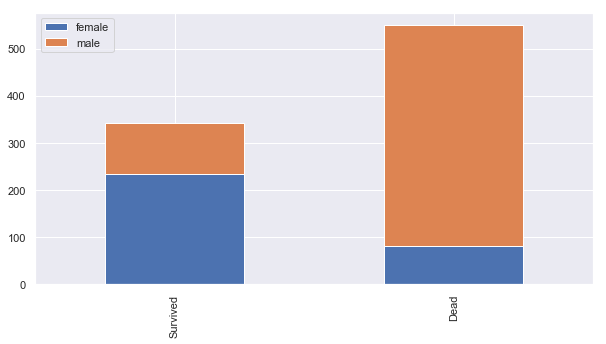

In [295]:
bar_chart('Sex')

Pclass에 따른 생존률을 계산해 본다.<br>
Survived가 1은 생존, 0은 사망이므로 Pclass에 따라 그룹을 지어서 평균을 내면 Pclass에 따른 상대적인 생존률을 비교할 수 있을 것이다.

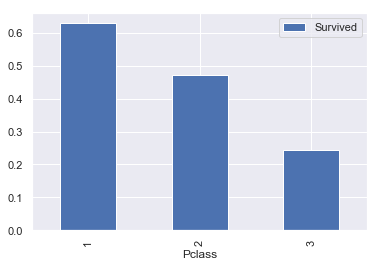

In [296]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar()

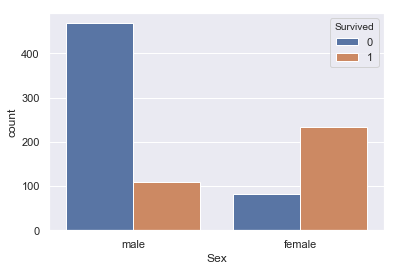

In [297]:
sns.countplot('Sex', hue='Survived', data=train)

Age에 대해 그래프를 그래서 분석을 해 본다.<br>

kde(Kernel density estimation) : 임의 변수의 확률밀도함수를 추정하기 위한 non-parametric한 방법.<br>
feature의 smooth한 분포를 본다고 생각하면 될 것 같다.<br>
Survived/Dead 각각 분포를 확인하는 것은 특별한 의미가 없을 것으로 판단된다.

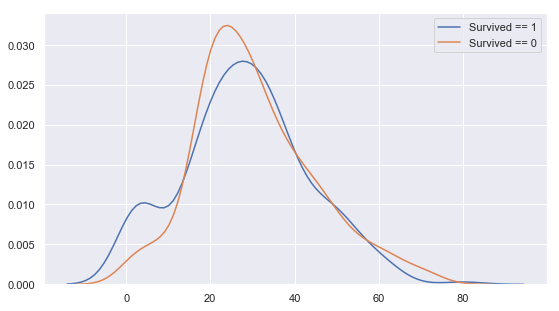

In [298]:
df = train[train['Age'].isnull() == False] # age는 nan이 많으므로 일단 걸러 내야 한다.
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df[df['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

위에서 Survived/Dead를 별개로 분포를 보는 것보다는 아래처럼 나이대를 나눠서 구간마다 Survived/Dead의 수를 비교하는 것이 한눈에 더 들어올 것 같음

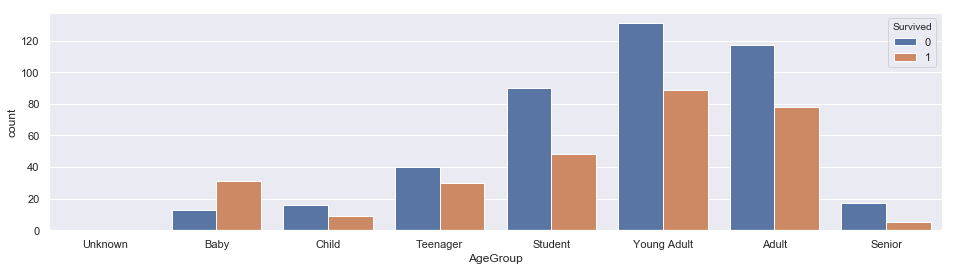

In [299]:
import numpy as np
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
# cut : value를 bins에 지정된 범위로 변환한다.(18.0, 24.0]와 같이 표현된다. labels를 지정하면 해당 범위에 명시된 label로 값이 변경된다.
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
sns.countplot('AgeGroup', hue='Survived', data=train, ax=ax)

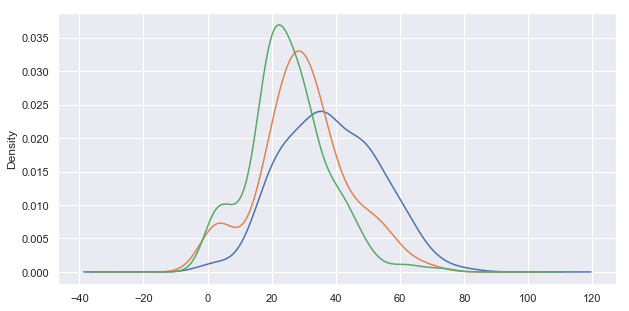

In [300]:
plt.figure(figsize=(10 ,5))
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')
plt.show()


Age가 변하면서 생존률이 어떻게 변하는지 확인하려 한다. <br>
아래는 가장 작은 나이부터 시작해서 점점 나이 범위를 증가시켜 가면서 평균 생존률이 어떻게 변화하는지 확인하는 그래프를 그린다.<br>
나이가 많은 승객들이 포함되면서 생존률이 떨어지는 것을 확인할 수 있다.

aga  0.42  ~  80.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


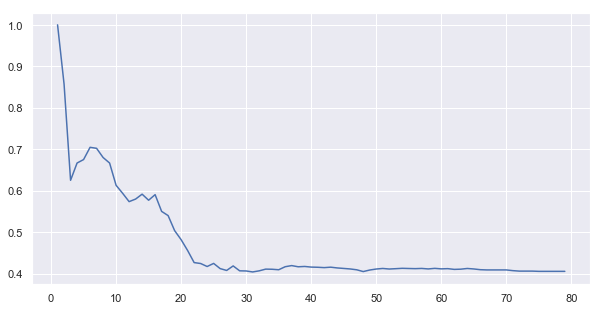

In [301]:
survival_ratios = []
df = train[train['Age'].isnull() == False]
age_min = df['Age'].min()
age_max = df['Age'].max()
print("aga ", age_min , " ~ ", age_max)
for i in range(int(age_min), int(age_max)):
    cummulated = df[df['Age'] < i]['Survived']
    survival_rate = cummulated.sum() / cummulated.shape[0]
    survival_ratios.append(survival_rate)
    
plt.figure(figsize=(10, 5))
plt.plot(survival_ratios)
plt.show()
    

seaborn의 violinplot을 사용해서 3개 feature를 한 그래프에 표현할 수 있다.<br>

seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs) <br>

**x, y, hue : x축, y축, 가운데 그려질 데이터 feature 이름** <br>
- x : x축에서 나열될 categorical feature
- y : y축에 표시될 feature
- hue : 세로축으로 표시될 binary feature(y축에 따른 feature의 분포가 표시 된다.)
<br>

**scale {“area”, “count”, “width”}** : 
 - area : violin 영역이 동일해 짐
 - count : violin의 폭은 데이터 수에 따라 scale될 예정
 - width : 양쪽 width의 max를 동일하게 그림.

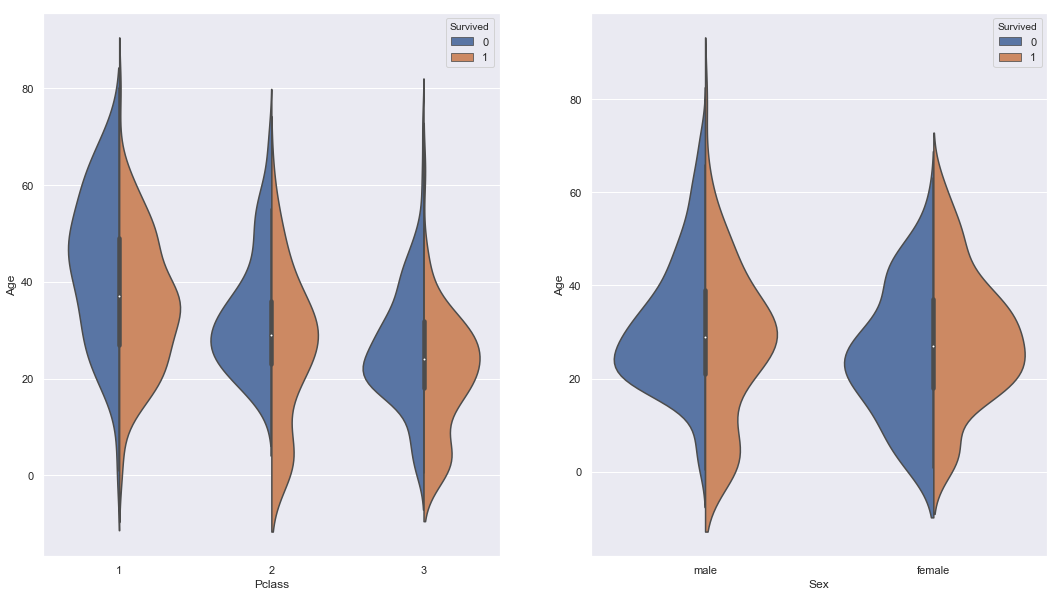

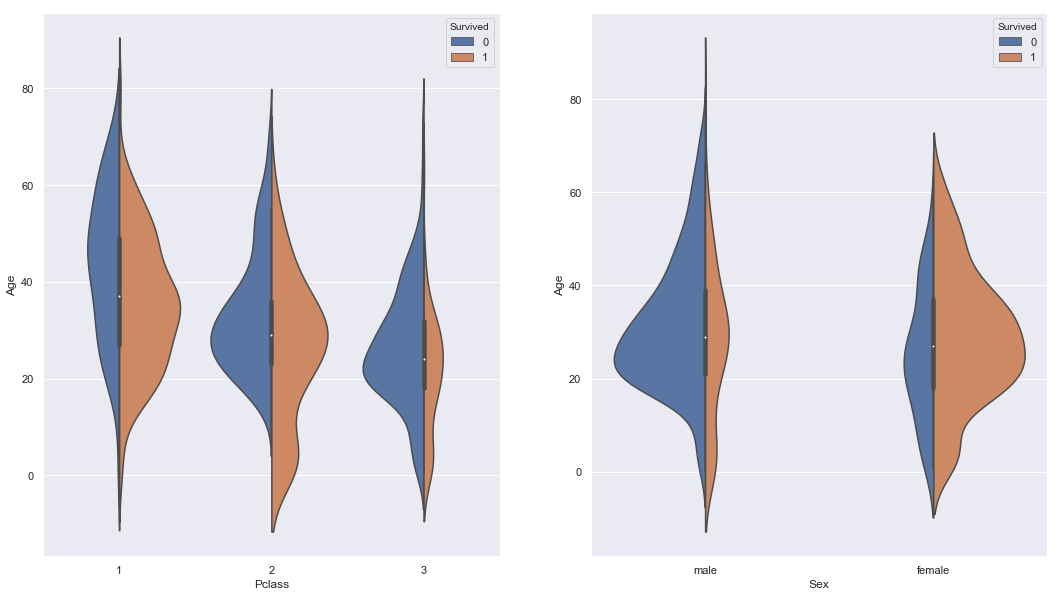

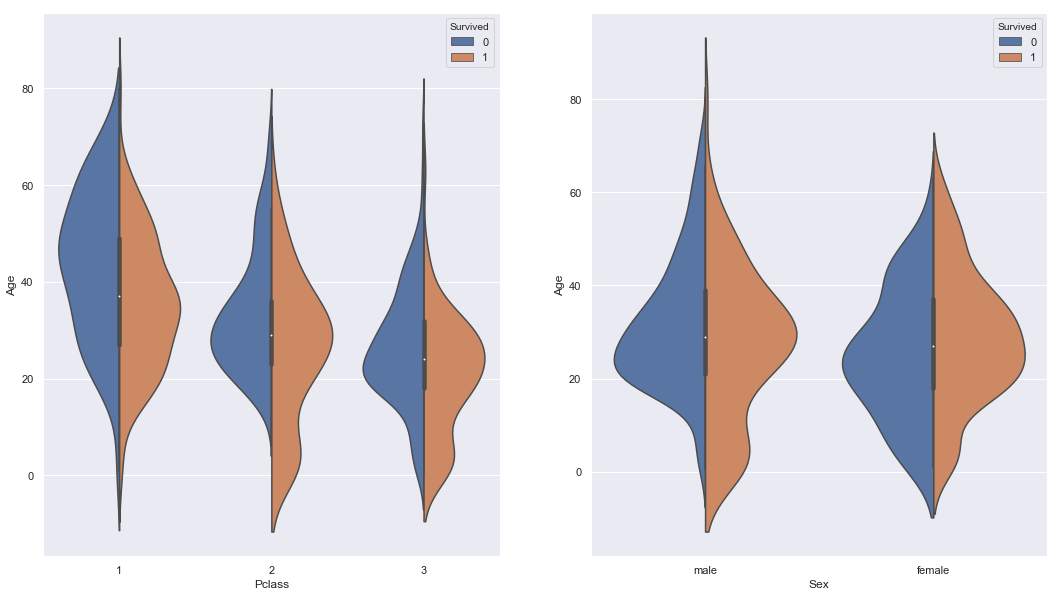

In [302]:
fig, ax = plt.subplots(1, 2, figsize=(18, 10))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, scale='area', split=True, ax=ax[0])
sns.violinplot('Sex', 'Age', hue='Survived', data=train, scale='area', split=True, ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(18, 10))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[0])
sns.violinplot('Sex', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(18, 10))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, scale='width', split=True, ax=ax[0])
sns.violinplot('Sex', 'Age', hue='Survived', data=train, scale='width', split=True, ax=ax[1])

In [303]:
train.describe(include="all") # all : 모든 column을 포함해서 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,714
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,7
top,NaN,NaN,NaN,"Vestrom, Miss. Hulda Amanda Adolfina",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S,Young Adult
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,220
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


## 데이터의 특성을 확인한다.
- age는 null 데이터가 177개 있다. (꽤 많음)
- cabin은 null이 687이다.
- 숫자가 아닌 데이터는 Name, Sex, Ticket, Cabin, Embarked임

## 일반적으로 다음과 같이 데이터를 가공한다.

- 불필요한 데이터는 제거한다.
- 숫자가 아닌 항목은 숫자로 변경한다.
- Null 데이터를 채워 넣는다.
- 데이터를 normalization한다.(Age)
 - normalization :  데이터를 0~1사이로 변환
 
## 여기서는 다음과 같이 한다.
- Cabin, Ticket 삭제 (Cabin은 값이 중구난방에 거의다 NULL, Ticket도 의미확인이 어려워 유의미한 feature를 뽑기가 만만치 않다. 

 Survived<br>
 Pclass<br>
 Name : 숫자로 변경?<br>
 Sex<br>
 Age : NULL 제거하고 Normalization<br>
 SibSp<br>
 Parch<br>
 ~~Ticket~~<br>
 Fare : Normalization<br>
 ~~Cabin~~<br>
 Embarked : 숫자로 변경<br>


In [304]:
# Cabin, Ticket 항목은 제거한다.(너무 많은 항목이 비어있고, 상관관계가 미약한 것으로 추정됨)
train = train.drop(['Cabin'], axis=1) # axis=0 or index : 인덱스를 찾아 삭제, axis=1 or columns : 전체 데이터에서 지정된 column을 제거.
test = test.drop(['Cabin'], axis=1)
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [305]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult


In [306]:
# 가장 많이 있는 값으로 채운다.
most_embarked_label = train["Embarked"].value_counts().index[0]
train = train.fillna({"Embarked" : most_embarked_label}) #비어있는 Embarked 항목은 그냥 "S"로 채운다.
test = test.fillna({"Embarked" : most_embarked_label}) #비어있는 Embarked 항목은 그냥 "S"로 채운다.
# 그냥 위 describe()로 얻은 표에서 Embarked의 top이 S이므로 바로 판단해서 적용해도 무방하다.

In [307]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,891,714
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,7
top,NaN,NaN,NaN,"Vestrom, Miss. Hulda Amanda Adolfina",male,NaN,NaN,NaN,NaN,S,Young Adult
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646,220
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


NN에 입력으로 넣으려먼 숫자값으로 변경해야 한다.

In [308]:
'''
머신 러닝에는 숫자값이 들어가야 하므로 알파벳으로 되어 있는 Embarked 항목을 숫자로 변경한다.
'''
embarked_mapping = pd.Series([1,2,3], ['S', 'C', 'Q'])
# 아래 코드도 동일한 동작을 한다.
'''
embarked_mapping = {"S" : 1, "C" : 2, "Q" : 3} #mapping 생성
'''

print(embarked_mapping)

S    1
C    2
Q    3
dtype: int64


In [309]:
# mapping의 index값에 일치하는 value를 mapping의 value값으로 변경
train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,Young Adult


기존 feature를 가공해서 새 feature를 추가할 수 있다.
Name에서 Title feature를 만든다. (Miss., Mr. 등의 문자열을 추출해서 새 feature로 추가)

In [310]:
df = train.copy()
df['Title'] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)    
print(df['Title'])

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Title, Length: 891, dtype: object


In [311]:
'''
Name에서 호칭(Title)을 추출해서 새 항목(Title)을 추가한다.
Name에서 새로운 feature을 만들어 내는 것임.
'''
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)    
    #아래와 같이 할 수도 있다.
    #dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)    

'''
crosstab : 두 개 이상의 factor에 대한 간단한 교차분석 표를 생성한다. 
    values와 aggregation function이 제공되지 않는 한 기본적으로 factor의 빈도를 기본으로 생성
'''
pd.crosstab(train['Title'], train['Sex'])
#pd.crosstab(train['Title'], train['Survived'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [312]:
#train['Title'].value_counts()
train['Title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Mlle', 'Col', 'Major',
       'Don', 'Countess', 'Ms', 'Jonkheer', 'Mme', 'Lady', 'Sir', 'Capt'],
      dtype='object')

In [313]:
'''
호칭들을 비슷한 것끼리 모아 정리해 본다.
'''
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona', 'Master'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')

# 정리한 Title로 생존률을 계산해 본다.
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Miss,0.702703
1,Mr,0.156673
2,Mrs,0.793651
3,Rare,0.466667
4,Royal,1.000000


In [314]:
pd.crosstab(train['Title'], train['Survived']) # 앞이 데이터, 뒤가 column.

Survived,0,1
Title,,
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,32,28
Royal,0,3


In [315]:
title_mapping = {"Mr" : 1, "Miss" : 2, "Mrs":3, "Royal":4, "Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,Young Adult,1


In [316]:
#Name과 PassengerId 삭제
train = train.drop(['Name', 'PassengerId'], axis=1)
test_passenger_id = test['PassengerId'] # 이건 나중에 쓸데가 있어서 백업해두어야 한다.
test = test.drop(['Name', 'PassengerId'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,0,3,male,22.0,1,0,7.2500,1,Student,1
1,1,1,female,38.0,1,0,71.2833,2,Adult,3
2,1,3,female,26.0,0,0,7.9250,1,Young Adult,2
3,1,1,female,35.0,1,0,53.1000,1,Young Adult,3
4,0,3,male,35.0,0,0,8.0500,1,Young Adult,1


In [317]:
# Sex도 숫자로 변경
sex_mapping = {"male":0, "female":1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,0,3,0,22.0,1,0,7.2500,1,Student,1
1,1,1,1,38.0,1,0,71.2833,2,Adult,3
2,1,3,1,26.0,0,0,7.9250,1,Young Adult,2
3,1,1,1,35.0,1,0,53.1000,1,Young Adult,3
4,0,3,0,35.0,0,0,8.0500,1,Young Adult,1


In [318]:
# Age 값 가공
import numpy as np
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
# cut : value를 bins에 지정된 범위로 변환한다.(18.0, 24.0]와 같이 표현된다. labels를 지정하면 해당 범위에 명시된 label로 값이 변경된다.
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,0,3,0,22.0,1,0,7.2500,1,Student,1
1,1,1,1,38.0,1,0,71.2833,2,Adult,3
2,1,3,1,26.0,0,0,7.9250,1,Young Adult,2
3,1,1,1,35.0,1,0,53.1000,1,Young Adult,3
4,0,3,0,35.0,0,0,8.0500,1,Young Adult,1



df:
           Adult  Baby  Child  Senior  Student  Teenager  Unknown  Young Adult
AgeGroup     78    31      9       5       48        30       52           89
AgeGroup    117    13     16      17       90        40      125          131


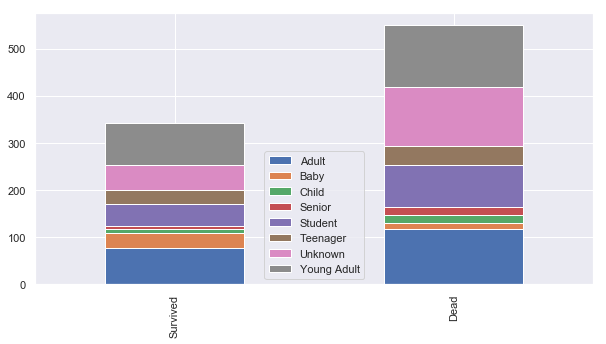

In [319]:
bar_chart('AgeGroup')

비어있는 Age를 추정해서 넣는 코드 부분<br>
아래 내용을 잘 검토해 볼 것.

In [320]:
#title_mapping = {"Mr" : 1, "Miss" : 2, "Mrs":3, "Master":4, "Royal":5, "Rare":6}
age_title_mapping = {1:"Young Adult", 2:"Student", 3:"Adult", 4:"Baby", 5:"Adult", 6:"Adult"}
print(train['Title'].value_counts().index)

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

train.head()

Int64Index([1, 2, 3, 5, 4], dtype='int64')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,0,3,0,22.0,1,0,7.2500,1,Student,1
1,1,1,1,38.0,1,0,71.2833,2,Adult,3
2,1,3,1,26.0,0,0,7.9250,1,Young Adult,2
3,1,1,1,35.0,1,0,53.1000,1,Young Adult,3
4,0,3,0,35.0,0,0,8.0500,1,Young Adult,1


In [322]:
train["AgeGroup"].value_counts().index

CategoricalIndex(['Young Adult', 'Adult', 'Student', 'Teenager', 'Baby',
                  'Child', 'Senior', 'Unknown'],
                 categories=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior'], ordered=True, dtype='category')

In [323]:
#AgeGroup을 숫자로 변경하고, Age는 삭제한다.
age_mapping = {'Baby':1, 'Child':2, 'Teenager':3, 'Student':4, 'Young Adult':5, 'Adult':6, 'Senior':7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,0,3,0,1,0,7.2500,1,4,1
1,1,1,1,1,0,71.2833,2,6,3
2,1,3,1,0,0,7.9250,1,5,2
3,1,1,1,1,0,53.1000,1,5,3
4,0,3,0,0,0,8.0500,1,5,1


In [324]:
#Fare(요금) 값 조정

# 비어있는 값은 평균으로 채워준다. test에만 1개 비어 있음
# train[train['Fare'].isnull()]['Fare'] = train['Fare'].mean()
# test[test['Fare'].isnull()]['Fare'] = test['Fare'].mean()

train.loc[train['Fare'].isnull(), ['Fare']] = train['Fare'].mean()
test.loc[test['Fare'].isnull(), ['Fare']] = test['Fare'].mean()

# qcut : Quantile-based discretization function. 변수를 순위나, 표본 분위수에 따라 균등 크기로 분류한다.
# Fare값의 범위에 따라 4개 등분으로 나뉘어지는데 각각 등분마다 포함된 사람 수는 동일하게 나눠진다.


train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[1,2,3,4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels=[1,2,3,4])

train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,0,3,0,1,0,1,4,1,1
1,1,1,1,1,0,2,6,3,4
2,1,3,1,0,0,1,5,2,2
3,1,1,1,1,0,1,5,3,4
4,0,3,0,0,0,1,5,1,2


In [325]:
train['FareBand'].value_counts() # 각각 그룹마다 수가 균일하게 나눠짐을 알 수 있다.

2    224
1    223
4    222
3    222
Name: FareBand, dtype: int64

train 데이터를 input(train_X)과 output(train_Y)로 나누어 준다.

In [326]:
'''
DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
labels : single label or list-like
    Index or column labels to drop.

axis : {0 or ‘index’, 1 or ‘columns’}, default 0
    Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

index, columns : single label or list-like
    Alternative to specifying axis (labels, axis=1 is equivalent to columns=labels).
'''

train_X = train.drop('Survived', axis=1)
train_Y = train['Survived'].astype('float32')

# test_X = test.drop('Survived', axis=1)
# test_Y = test['Survived']

In [327]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null int64
Title       418 non-null int64
AgeGroup    418 non-null int64
FareBand    418 non-null category
dtypes: category(1), int64(7)
memory usage: 23.5 KB


In [328]:
test.describe(include='all')

,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0
mean,2.265550,0.363636,0.447368,0.392344,1.464115,1.791866,4.744019,NaN
std,0.841838,0.481622,0.896760,0.981429,0.685516,1.134686,1.240417,NaN
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN
25%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,NaN
50%,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,NaN
75%,3.000000,1.000000,1.000000,0.000000,2.000000,2.000000,6.000000,NaN


In [330]:
from sklearn.preprocessing import MinMaxScaler

class NoColumnError(Exception):
    """Raised when no column in dataframe"""
    def __init__(self, value):
        self.value = value
    # __str__ is to print() the value
    def __str__(self):
        return(repr(self.value))

# normalize AgeGroup
def normalize_column(data, columnName):
    scaler = MinMaxScaler()    
    if columnName in data:
        #print(data[columnName].values.shape)
        aaa = scaler.fit_transform(data[columnName].values.reshape(-1, 1)) # 입력을 2D 데이터로 넣어야 하므로 reshape해 준다.
        aaa = aaa.reshape(-1,) # 다시 원복해서 넣어주지만, 그냥 넣어도 알아서 제대로 들어간다...
        #print(aaa.shape)
        data[columnName] = aaa
        return data
    else:
        raise NoColumnError(str(columnName) + " is not exists!")

def normalize(dataset):
    dataset = normalize_column(dataset, "AgeGroup")
    dataset = normalize_column(dataset, "Pclass")
    dataset = normalize_column(dataset, "Embarked")
    dataset = normalize_column(dataset, "Title")
    dataset = normalize_column(dataset, "SibSp")
    dataset["FareBand"] = dataset["FareBand"].astype('float')
    dataset = normalize_column(dataset, "FareBand")
    dataset = normalize_column(dataset, "Parch")

normalize(train)
normalize(test)


print(test)



     Pclass  Sex  SibSp     Parch  Embarked  Title  AgeGroup  FareBand
0       1.0    0  0.000  0.000000       1.0   0.00  0.666667  0.000000
1       1.0    1  0.125  0.000000       0.0   0.50  0.833333  0.000000
2       0.5    0  0.000  0.000000       1.0   0.00  1.000000  0.333333
3       1.0    0  0.000  0.000000       0.0   0.00  0.666667  0.333333
4       1.0    1  0.125  0.111111       0.0   0.50  0.500000  0.333333
5       1.0    0  0.000  0.000000       0.0   0.00  0.333333  0.333333
6       1.0    1  0.000  0.000000       1.0   0.25  0.666667  0.000000
7       0.5    0  0.125  0.111111       0.0   0.00  0.666667  0.666667
8       1.0    1  0.000  0.000000       0.5   0.50  0.333333  0.000000
9       1.0    0  0.250  0.000000       0.0   0.00  0.500000  0.666667
10      1.0    0  0.000  0.000000       0.0   0.00  0.666667  0.000000
11      0.0    0  0.000  0.000000       0.0   0.00  0.833333  0.666667
12      0.0    1  0.125  0.000000       0.0   0.50  0.500000  1.000000
13    

In [332]:
train_X = train.drop('Survived', axis=1).values # Series.values는 numpy array 데이터임.
train_Y = train['Survived'].values.reshape(-1, 1)

print(train_X.shape)
print(train_Y.shape)

(891, 8)
(891, 1)


In [333]:
import tensorflow as tf

train_X = train_X.astype(np.float32)
train_Y = train_Y.astype(np.float32)
print(train_X.shape)
print(train_Y.shape)

X = tf.placeholder(tf.float32, shape=[None, train_X.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None, 1])

learning_rate = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
    
def build_neural_network(X):    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(X, 40, activation=None, kernel_initializer=initializer)
    fc = tf.nn.relu(fc)
    fc = tf.nn.dropout(fc, keep_prob=keep_prob)
    
    fc = tf.layers.dense(fc, 20, activation=None, kernel_initializer=initializer)
    fc = tf.nn.relu(fc)
    fc = tf.nn.dropout(fc, keep_prob=keep_prob)
    
    logits = tf.layers.dense(fc, 1, activation=None)    
    return logits

def get_batch(i, x, y, batch_size=32):
    end = (i + 1) * batch_size
    if end > x.shape[0]:        
        end = x.shape[0]        
    batch_x = x[i * batch_size : end]
    batch_y = y[i * batch_size : end]
    #print("get_batch:", batch_x.shape, batch_y.shape)
    return batch_x, batch_y

logits = build_neural_network(X)
print(logits)
print(train_Y.shape)
a = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits)
cost = tf.reduce_mean(a)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
prediction = tf.nn.sigmoid(logits)
is_correct = tf.equal(tf.round(prediction), Y)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

epochs = 200
batch_size = 32
num_batch = train_X.shape[0] // batch_size
print("num_batch=", num_batch)
lr = 0.01

from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)


with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        avg_cost = 0
        for batch_idx in range(num_batch + 1):
            batch_x, batch_y = get_batch(batch_idx, train_X, train_Y, batch_size)
            c, _ = session.run([cost, optimizer], feed_dict={X:batch_x, Y:batch_y, learning_rate:lr, keep_prob:0.7})
            avg_cost += (c / num_batch)
            
        #print("epoch:", epoch, " cost:{:.9f}".format(avg_cost))
        
    print("accuracy:", accuracy.eval(session=session, feed_dict={X:train_X, Y:train_Y, keep_prob:1.0}))
    
    pred = session.run(prediction, feed_dict={X:test, keep_prob:1.0}) # (418,1)
    print(pred.shape)
    print("nan count:", np.count_nonzero(np.isnan(pred) == True))
    
    test_predict_result=binarizer.fit_transform(pred)
    test_predict_result=test_predict_result.astype(np.int32)
    #print(test_predict_result[:10])
    submission = pd.DataFrame({"PassengerId" : test_passenger_id, "Survived":test_predict_result.reshape(-1)})
    submission.to_csv('submission.csv', index=False)
    
    print(submission)

    

(891, 8)
(891, 1)
Tensor("dense_9/BiasAdd:0", shape=(?, 1), dtype=float32)
(891, 1)
num_batch= 27
accuracy: 0.86195284
(418, 1)
nan count: 0
     PassengerId  Survived
0            892         1
1            893         1
2            894         1
3            895         1
4            896         1
5            897         0
6            898         1
7            899         1
8            900         1
9            901         0
10           902         1
11           903         1
12           904         1
13           905         1
14           906         1
15           907         1
16           908         1
17           909         1
18           910         1
19           911         1
20           912         1
21           913         0
22           914         1
23           915         1
24           916         1
25           917         1
26           918         1
27           919         1
28           920         1
29           921         0
..           ...      